In [1]:
import pandas as pd 
df = pd.read_csv('Churn_Modelling (1).csv')
pd.options.display.max_rows = 10005
# df.head(10)

In [2]:
df.drop_duplicates(['Surname', 'CustomerId'])
df.info()                  #This is to drop duplicate files by ID(if any). lucky for us there's none

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [3]:
df["Surname"]=df["Surname"].replace("[^a-zA-Z]","",regex=True)
df["CustomerId"]=df["CustomerId"].replace("[^0-9]","",regex=True)   #cleaning all unwanted characters

In [4]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [287]:
exited_mem = df[df['Exited']==1]
print("EXITED MEMBERS")
exited_mem.count()                  #here we check for the count of exited members = 2037

EXITED MEMBERS


RowNumber          2037
CustomerId         2037
Surname            2037
CreditScore        2037
Geography          2037
Gender             2037
Age                2037
Tenure             2037
Balance            2037
NumOfProducts      2037
HasCrCard          2037
IsActiveMember     2037
EstimatedSalary    2037
Exited             2037
dtype: int64

In [319]:
active_mem =  df[df['Exited']==0]
print("ACTIVE MEMBERS")
active_mem.count()          #here we check for the count of active members = 7963
                            #so the company has 10,000 members and 7963 are active while 2037 are not.                 

ACTIVE MEMBERS


RowNumber          7963
CustomerId         7963
Surname            7963
CreditScore        7963
Geography          7963
Gender             7963
Age                7963
Tenure             7963
Balance            7963
NumOfProducts      7963
HasCrCard          7963
IsActiveMember     7963
EstimatedSalary    7963
Exited             7963
dtype: int64

([<matplotlib.axis.XTick at 0x1c282b097d0>,
 [Text(0, 0, 'Active 7963'), Text(1, 0, 'Inactive 2037')])

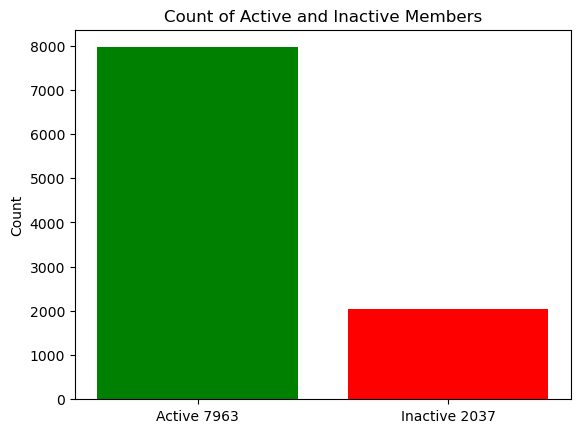

In [173]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

members = df['Exited'].value_counts()

plt.bar(members.index, members.values, color=['green', 'red'])
plt.ylabel('Count')
plt.title('Count of Active and Inactive Members')
plt.xticks([0, 1], ['Active 7963', 'Inactive 2037'])  #we vaisualize the number of active members to inactive members


In [291]:
 #so the company has 10,000 members and 7963 are active while 2037 are not.
df[df['Balance']==0.00].count()  #Here we check for number of members who has an empty account = 3617
# active_mem.head(20)     #using code "active_mem[active_mem['Balance']==0.00].count()", we check for 
active_mem[active_mem['Balance']==0.00].count()  #active members whose accounts are empty and that equals 3117. so out of 7963 active members 
                                                #3117 have no money in their account. that is about 39.14% of the active members
                                                #Also using code (exited_mem[exited_mem['Balance']==0.00].count()), we check for exited members
                                                #with no money in their account = 500. so out of 2037 exited members, 500 have no monery in account
                                                # that's about 24.55%.
active_mem[active_mem['Balance']==0.00].count()

RowNumber          3117
CustomerId         3117
Surname            3117
CreditScore        3117
Geography          3117
Gender             3117
Age                3117
Tenure             3117
Balance            3117
NumOfProducts      3117
HasCrCard          3117
IsActiveMember     3117
EstimatedSalary    3117
Exited             3117
dtype: int64

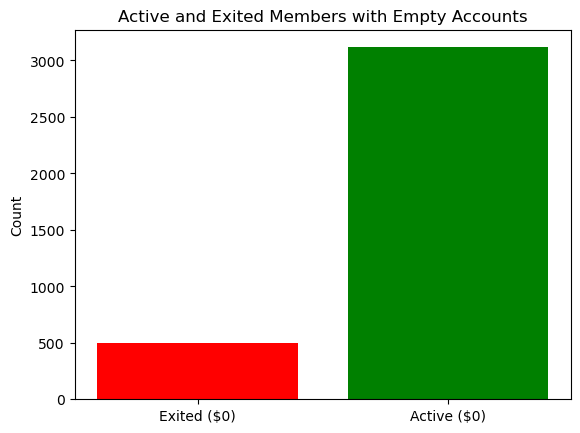

In [178]:
import matplotlib.pyplot as plt

# Assuming exited_mem and active_mem are pandas DataFrames

# Count members with balance 0.00
exited_with_empty_count = exited_mem[exited_mem['Balance'] == 0.00].shape[0]
active_with_empty_count = active_mem[active_mem['Balance'] == 0.00].shape[0]

# Data for plotting
categories = ['Exited ($0)', 'Active ($0)']
counts = [exited_with_empty_count, active_with_empty_count]

# Create bar chart
plt.bar(categories, counts, color=['red', 'green'])
plt.ylabel('Count')
plt.title('Active and Exited Members with Empty Accounts')

# Display the plot
plt.show()


#### Therefore comparing the percentage of active members with no money in their account to the percentage of exited members with no money in their account, we'd discover that there are actually more of bankrupt active members than broke exited members, thus we deduct that bankrupcy is not the reason they left


##    ANALYSIS OF EXITED MEMBERS WITH REGARD TO GEOGRAPHY

In [50]:
# df[df['Geography']=='France'].count()    #here we check for total number of members who are from France = 5014
# exited_mem[exited_mem['Geography']=='France'].count()  #we also check the number of France customers who exited=810
                                            #that is to say that 16.16% of France members exited.
                                            #also we should note that 50% of the company's customers are from France
franc = df[df['Geography']=='France']


In [75]:
# df[df['Geography']=='Germany'].count()    #here we check for total number of members who are from Germany = 2509
# exited_mem[exited_mem['Geography']=='Germany'].count()  #we also check the number of Germany customers who exited=814
                                            #that is to say that 32.44% of German members exited.
                                            #also we should note that 25% of the company's customers are from Germany
german = df[df['Geography']=='Germany']


In [77]:
df[df['Geography']=='Spain'].count()    #here we check for total number of members who are from Spain = 2477
exited_mem[exited_mem['Geography']=='Spain'].count()  #we also check the number of Spain customers who exited=413
                                            #that is to say that 16.67% of Spain members exited.
                                            #also we should note that about 25% of the company's customers are from Spain
spain = df[df['Geography']=='Spain']
# spain.count()

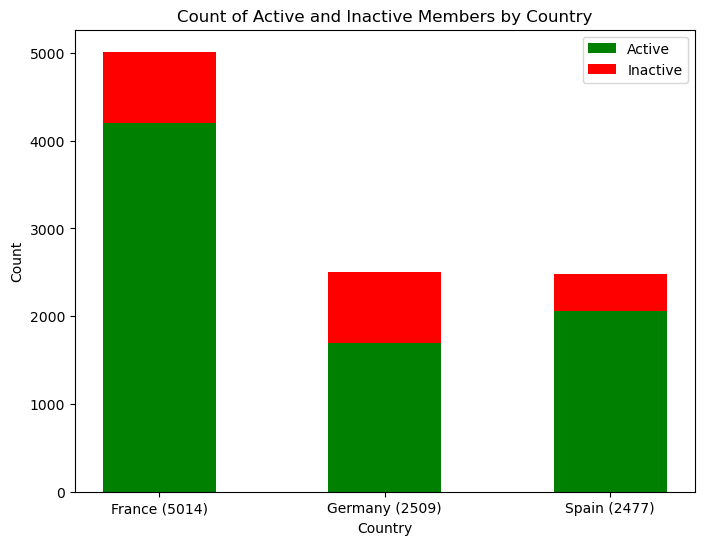

In [295]:
# Count active and inactive members per country
grouped_df = df.groupby(['Geography', 'Exited']).size().unstack(fill_value=0)

# Rename columns for clarity
grouped_df.columns = ['Inactive', 'Active']

bar_width = 0.5
bar_positions = np.arange(len(grouped_df))

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot stacked bars
ax.bar(bar_positions, grouped_df['Inactive'], bar_width, label='Active', color='green')
ax.bar(bar_positions, grouped_df['Active'], bar_width, bottom=grouped_df['Inactive'], label='Inactive', color='red')

# Add labels and title         2509
ax.set_xlabel('Country')
ax.set_ylabel('Count')
ax.set_title('Count of Active and Inactive Members by Country')
ax.set_xticks(bar_positions)            #plt.xticks([0, 1], ['Inactive 4849', 'Active 5151'])
ax.set_xticklabels(['France (5014)','Germany (2509)', 'Spain (2477)'])
ax.legend()          #we plot a graph to display countries by active and inactive members
                    #and clearly we can see that france has the highest population  (5014)
# Show the plot     #From this graph we also realize that the ratio of active users to inactive users for each country doesn't varry much aprox.the same
                    ###This is to say that comparison by active to inactive members is nearly the same amongst countries
plt.show()          

##### This analysis shows that Germany has a high number of members who exited and this raises a concern 

##    ANALYSIS OF MEMBERS BY GEOGRAPHY WITH REGARDS TO NUMBER OF PRODUCTS PURCHASED

In [296]:
# df['NumOfProducts'].sum()     #Here we check total number of purchased products  = 15302
franc['NumOfProducts'].sum()   #Then we check the number of products purchased by France members 
franc_mem_by_prod = franc['NumOfProducts'].sum()  #so total number of products purchased by France members = 7676. that is about 50% of the total number of products
franc_mem_by_prod

7676

In [297]:
# df['NumOfProducts'].sum()     #Remember total number of purchased products  = 15302
german['NumOfProducts'].sum()   #Then we check the number of products purchased by German members 
german_mem_by_prod = german['NumOfProducts'].sum()  #so total number of products purchased by German members = 3813. that is about 24.9% of the total number of products
german_mem_by_prod

3813

In [298]:
# df['NumOfProducts'].sum()     #Remember total number of purchased products  = 15302
spain['NumOfProducts'].sum()   #Then we check the number of products purchased by Spain members 
spain_mem_by_prod = spain['NumOfProducts'].sum()  #so total number of products purchased by Spain members = 3813. that is about 24.9% of the total number of products
spain_mem_by_prod

3813

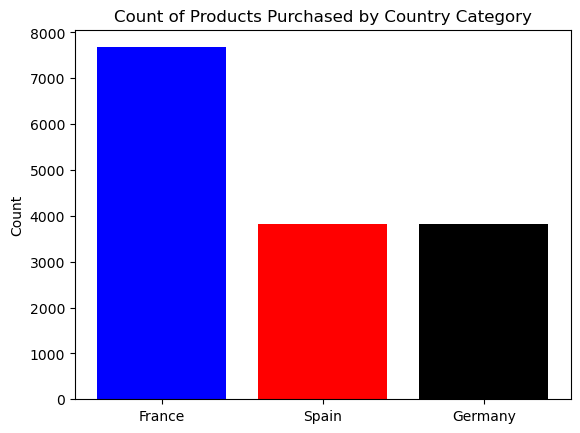

In [300]:
categories = ['France', 'Spain', 'Germany']
counts = [franc_mem_by_prod, german_mem_by_prod ,spain_mem_by_prod]

plt.bar(categories, counts, color= ['blue', 'red', 'black'])
plt.ylabel('Count')
plt.title('Count of Products Purchased by Country Category')
plt.show()

##### This analysis shows that Germany has a high number of members who exited and this raises a concern 

## BROKE TEST ANALYSIS BY COUNTRY

In [301]:
broke_test_germany = exited_mem[exited_mem['Geography']=='Germany']
german_plot = broke_test_germany[broke_test_germany['Balance']==0.00]      #so from here we find out that 
german_plott = german_plot['Age'].count()                                  #Germany Exited customers that has no money in their account is 0
                                                         
german_plott

0

In [302]:
broke_test_france = exited_mem[exited_mem['Geography']=='France']
broke_test_france[broke_test_france['Balance']==0.00].count()   #so from here we find out that 
broke_test_france['Age'].count()        #France customers who left and has no money in their account is 337 out of 810
france_plot = broke_test_france[broke_test_france['Balance']==0.00] #that is to say about 42% of France Exited members are broke
france_plott = france_plot['Age'].count()                            #so we can say that majority of exited customers from France could have left due to 
france_plott                                                         #insufficient account balance since a good percentage of them "42%" have no money

# france_plot

337

In [305]:
broke_test_Spain = exited_mem[exited_mem['Geography']=='Spain']
broke_test_Spain[broke_test_Spain['Balance']==0.00].count() #so from here we find out that 
                                                            #Spain customers who left and has no money in their account is 163 out of 413
spain_plot = broke_test_Spain[broke_test_Spain['Balance']==0.00]  #about 39.4% of Spain Exited members are broke
spain_plott = spain_plot['Age'].count()                           #so we can say that majority of exited customers from Spain could have left due to 
spain_plott                                                        #insufficient account balance since a good percentage of them "39.4%" have no money

163

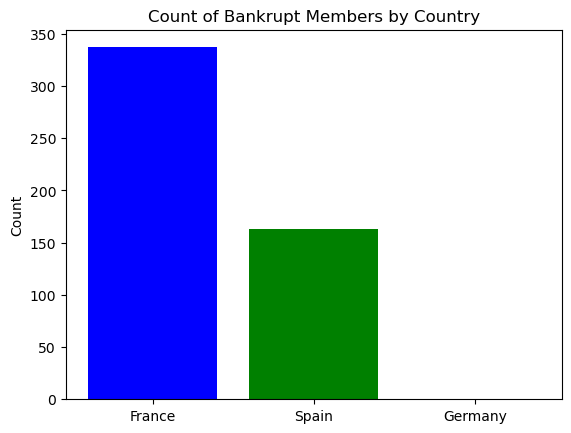

In [304]:
# Define the categories and counts
categories = ['France', 'Spain', 'Germany']
counts = [france_plott, spain_plott, german_plott]  # Ensure these variables are defined with count values

# Create the bar chart
plt.bar(categories, counts, color=['blue', 'green', 'red'])

# Add labels and title
# plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Count of Bankrupt Members by Country')

# Display the plot
plt.show()


##### The analysis above raises a serious concern, as Germany which has the highest number of exited members cannot be aligned with 
##### bankrupcy. More analysis should be done in regard to German members, as to find out why they left

##  WE CHECK THE RELATIONSHIP BETWEEN SALARY AND NUMBER OF PRODUCTS PURCHASED

In [17]:
mean_salary = df['EstimatedSalary'].mean()  #mean salary
mean_salary

100090.239881

In [214]:
df['NumOfProducts'].sum()

15302

In [310]:
good_salary = df[df['EstimatedSalary'] > mean_salary] #we check the number of members whose salary is greater than the mean salary = 5007
good_salary_plot = good_salary['NumOfProducts'].sum()       #then we check for number of products they purchased  = 7696
good_salary_plot

7696

In [309]:
poor_salary = df[df['EstimatedSalary'] < mean_salary]  #we check the number of members whose salary is less than the mean salary =4993
                                                       #then we check for number of products they purchased  = 7606
poor_salary_plot = poor_salary['NumOfProducts'].sum()  
#so we check the number of products people purchased with regards to their salary
#we realize that the salary didn't really influence the number of products people 
#purchased, as the number of products those with good salary purchased is 7696,
#while number of products those with poor salary purchased is 7606. this solidifies our 
###proposition that salary didn't influence the purchasing power of customers
# poor_salary.count()
poor_salary_plot

7606

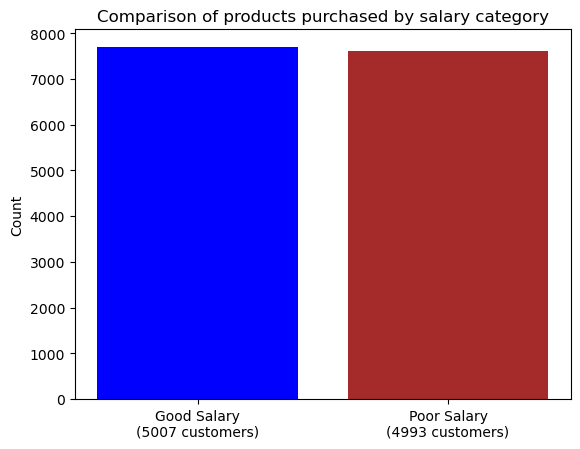

In [220]:
categories = [f'Good Salary\n(5007 customers)', f'Poor Salary\n(4993 customers)']
counts = [good_salary_plot, poor_salary_plot]

plt.bar(categories, counts, color = ['blue', 'brown'])
# plt.xlabel('')
plt.ylabel('Count')
plt.title('Comparison of products purchased by salary category')
plt.show()

##### From the analysis above it obvious that salary didn't affect the purchase power of customers

## CHECK RELATIONSHIP BETWEEN CREDIT SCORE AND PURCHASE OF GOODS BY CUSTOMERS

In [49]:
credit_mean = df['CreditScore'].mean()   #we check the mean credit score to see how it influences purchase
credit_mean

650.5288

In [21]:
df['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [314]:
df['NumOfProducts'].sum()

15302

In [228]:
# using code below, and for each percenitle we check for many product each percentile group was able to purchase
sevetyFifth_percentile = df[df['CreditScore'] >= 718.000000 ]
sevetyFifth_percentile['NumOfProducts'].sum()

3837

In [311]:
df['NumOfProducts'].sum()   #75th percertile and above purchased 3837 products
                            #50th percentile to 75th percentile = 3837 products
                            #25th percentile to 50th percentile = 3867 products
                            #min percentile to 25th percentile = 3761 products
                            #these figures sumed up amounts to 15302(total purchase)


15302

##### this indicates that people with what ever credit scores had purchased approx. equal number of products. therefore credit score didn't generally influence purchase


## ANALYSIS OF PRODUCTS PURCHASED WITH REGARDS TO GENDER

Text(0.5, 1.0, 'Number of products purchased by Gender Catergory')

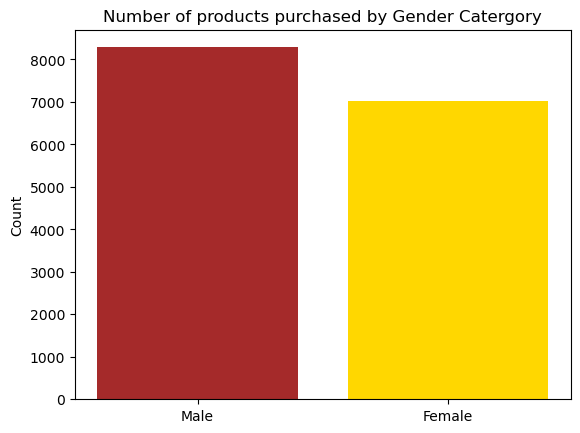

In [234]:
male = df[df['Gender'] == 'Male']     #Number of male customers = 5457
                                      #Number of products purchased by males = 8287

female = df[df['Gender'] == 'Female']  #Number of female customers = 4543
                                       #Number of products purchased by female = 7015
#RESULT



# female.count()
num_of_prod_by_female = female['NumOfProducts'].sum()
num_of_prod_by_male = male['NumOfProducts'].sum()
categories  = ['Male', 'Female']
counts = [num_of_prod_by_male, num_of_prod_by_female]

plt.bar(categories, counts, color= ['brown', 'gold'])
plt.ylabel('Count')
plt.title('Number of products purchased by Gender Catergory')

#### this indicates that the number of female customers  to male customers is approx. 83.3%. While the number of products purchased by female customers to male customers is approx. 84.6%.
#### THIS SHOWS THAT GENDER DIDN'T INFLUENCE THE PURCHASE POWER OF CUSTOMERS


#          SPECIAL ANALYSIS FOR GERMANY

###### by salary

In [118]:
german['EstimatedSalary'].describe()

count      2509.000000
mean     101113.435102
std       58263.011501
min          11.580000
25%       51016.020000
50%      102397.220000
75%      151083.800000
max      199970.740000
Name: EstimatedSalary, dtype: float64

In [119]:
print(german['EstimatedSalary'].describe(), f"\n__SPACING__\n",  df['EstimatedSalary'].describe())

count      2509.000000
mean     101113.435102
std       58263.011501
min          11.580000
25%       51016.020000
50%      102397.220000
75%      151083.800000
max      199970.740000
Name: EstimatedSalary, dtype: float64 
__SPACING__
 count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64


In [98]:
df['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

In [313]:
german['Balance'].describe()

count      2509.000000
mean     119730.116134
std       27022.006157
min       27288.430000
25%      102800.720000
50%      119703.100000
75%      137560.380000
max      214346.960000
Name: Balance, dtype: float64

##### German analysis by Age Category

In [235]:
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [102]:
german['Age'].describe()

count    2509.000000
mean       39.771622
std        10.519143
min        18.000000
25%        32.000000
50%        38.000000
75%        45.000000
max        84.000000
Name: Age, dtype: float64

In [316]:
# german[german['Gender'] == 'Male'].count()        #German male members = 1316
# german[german['Gender'] == 'Female'].count()        #German female members = 1193
                                            
german[german['Age'] < 32].count()    #German members between age quartile of 75% and more (45)= 688
                                             #German members between age 50%-75% (38,45)=650
                                             #German members between age 25%-50% (32-38)= 631
                                             #German members less 25% (from 32 downwards)= 540



RowNumber          540
CustomerId         540
Surname            540
CreditScore        540
Geography          540
Gender             540
Age                540
Tenure             540
Balance            540
NumOfProducts      540
HasCrCard          540
IsActiveMember     540
EstimatedSalary    540
Exited             540
dtype: int64

In [315]:
#here we check how many products each age quartile purchased
# german[german['Age'] <= 32.000000]['NumOfProducts'].sum()      #for 25% and less =974
# german[german['Age'] <= 38.000000]['NumOfProducts'].sum()       #for 50% to 25% = 961
# german[german['Age'] <= 45.000000]['NumOfProducts'].sum()        #for 75% to 50% = 989
german[german['Age'] > 45.000000]['NumOfProducts'].sum()        #for over 75%% = 889

889

##### This analysis indicates that customers from Germany does not specifically fall under a certain age  quartile. Thus we cannot say that age influenced the customer churn

##  Analysis  of German customer by Salary Category

In [255]:
df['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [318]:
german[german['EstimatedSalary']>= 149388.247500].count()
                                    # minimum salary =          11.58  --  11.58  standard minimum salary
                                    # mean salary for Germany = 101113. --  100090 = standard mean salary
                                    # maximum salary =         199970  -- 199992 = standard max salary
                                    # This analysis proves that the salary of german member is by far more sufficient than the average account of balance of the data's general 
                                    # balance. So ins
                                    
                                    # ____________________
                                    # using code 'german[german['EstimatedSalary'] <= 51002.110000].count()',
                                    # we check for German memebers whose salary is at 25% percent salary or less= 627
                                    # we also check German members wehose salary is between 50% to 25% salary = 607
                                    # we also check German members wehose salary is between 75% to 50% salary = 647

RowNumber          647
CustomerId         647
Surname            647
CreditScore        647
Geography          647
Gender             647
Age                647
Tenure             647
Balance            647
NumOfProducts      647
HasCrCard          647
IsActiveMember     647
EstimatedSalary    647
Exited             647
dtype: int64

##### We from the analysis above, deduct that Salary did not in affect the customer churn for German members, as each Salary quartile had purchased approx. equal number of products

##  Analysis  of German customer by CreditScore Category

In [257]:
german.sort_values(by = 'CreditScore', ascending = True).head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1838,1839,15758813,Campbell,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1
2473,2474,15679249,Chou,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1
2579,2580,15597896,Ozoemena,365,Germany,Male,30,0,127760.07,1,1,0,81537.85,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
6253,6254,15675337,Forbes,395,Germany,Female,34,5,106011.59,1,1,1,17376.57,1


In [166]:
df['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [268]:
meannn = df['CreditScore'].mean()    
meannn    #mean creditscore 

650.5288

In [281]:
german[german['Exited'] ==1].count()
# german[german['Exited'] == 0].count()

RowNumber          814
CustomerId         814
Surname            814
CreditScore        814
Geography          814
Gender             814
Age                814
Tenure             814
Balance            814
NumOfProducts      814
HasCrCard          814
IsActiveMember     814
EstimatedSalary    814
Exited             814
dtype: int64

In [286]:
# german[german['CreditScore'] < meannn ].count()         #number of German members with creditscore less than mean creditscore = 1250
# german[german['CreditScore'] > meannn ].count()           ##number of German members with creditscore greater than mean creditscore = 1259
germ_ext_poor_CS = german[german['CreditScore'] > meannn ]
# germ_ext_poor_CS[germ_ext_poor_CS['Exited']==1].count()  #number of exited German members with good creditscore = 393

germ_active_poor_CreditS = german[german['CreditScore'] < meannn ]
germ_active_poor_CreditS[germ_active_poor_CreditS['Exited'] == 1].count()  #number of exited German members with bad creditscore = 421

RowNumber          421
CustomerId         421
Surname            421
CreditScore        421
Geography          421
Gender             421
Age                421
Tenure             421
Balance            421
NumOfProducts      421
HasCrCard          421
IsActiveMember     421
EstimatedSalary    421
Exited             421
dtype: int64

The analysis above proves there is no much difference in the number of inactive German members with bad creditscore(393) to the number of inactive German members with good creditscore (421)

#                         CONCLUSION

 *  Total number of active to inactive customers varry a lot, as the company has out of their 10000 cutomers,  7963 to be active, that is about 80% of their customers.

 * The customers of the company are from 3 countries(France,Germany and Spain). The relationship between the number of active members for each country is nearly identical. however to inactive members, there is a little need for alarm, as German has a high number of inactive members, conpared to France and Spain.
 * Comparing countries by bankrupcy rate and its influnce over activeness of customers, we see that France, and Spain has a good percentage of their inactive members to be bankrupt, thus, the major reason why customers from these places left could be ascribed to the issue of bankrupt. But Germany on the other hand does not have any bankrupt members. In fact, customers from there have very strong financial capability, and this raises a serious concern.
 * Analysis done with regards to the creditscore, age, gender and their individual influence over the purchase power of customers, proves that these factor did not have great influence over the purchase of products.
 * Therefore more analysis should be done for German with other factors, other than the ones provided